<a href="https://colab.research.google.com/github/akatko/HW5/blob/main/Kohler_HW5_AODC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
house = pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

Mounted at /content/drive


,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [ ]:
states = ['Michigan', 'California', 'Texas', 'Indiana']

house['date'] = pd.to_datetime(house['date'], errors='coerce')

filtered_house = house[house['state'].isin(states)]

filtered_house.head()


,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
2016,2017,1976-01-01,California,9.1,17.908764,0.139067
2017,2018,1976-02-01,California,9.1,18.117587,0.148485
2018,2019,1976-03-01,California,9.0,18.379530,0.151243
2019,2020,1976-04-01,California,9.0,18.673067,0.147308
2020,2021,1976-05-01,California,8.9,18.899995,0.143167


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

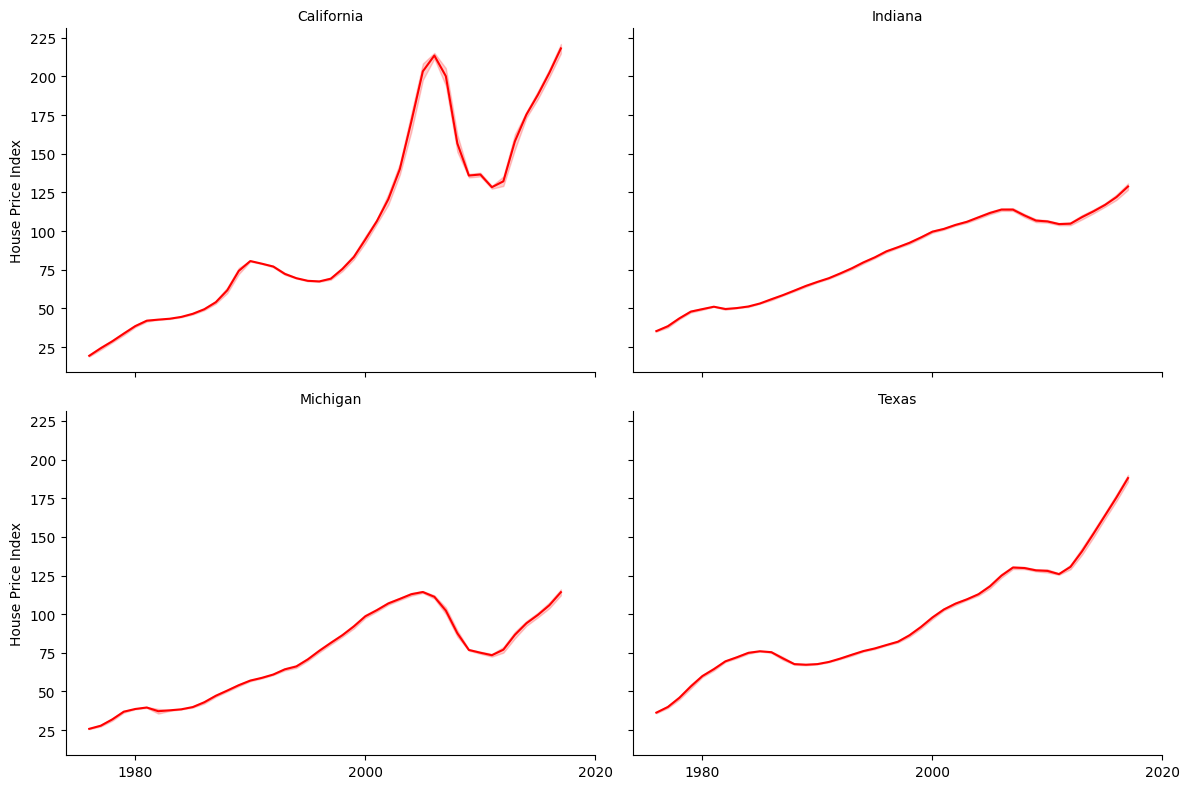

In [ ]:
house['date'] = pd.to_datetime(house['date'], errors='coerce')

house['year'] = house['date'].dt.year

states = ['Michigan', 'California', 'Texas', 'Indiana']
filtered_house = house[house['state'].isin(states)]

g = sns.FacetGrid(filtered_house, col='state', col_wrap=2, height=4, aspect=1.5)

g.map_dataframe(sns.lineplot, x='year', y='house_price_index', color='red')

g.set(xticks=[1980, 2000, 2020])
g.set_xticklabels(['1980', '2000', '2020'])

g.set_ylabels('House Price Index')

g.set_xlabels('')

g.set_titles(col_template="{col_name}")

g.tight_layout()


c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

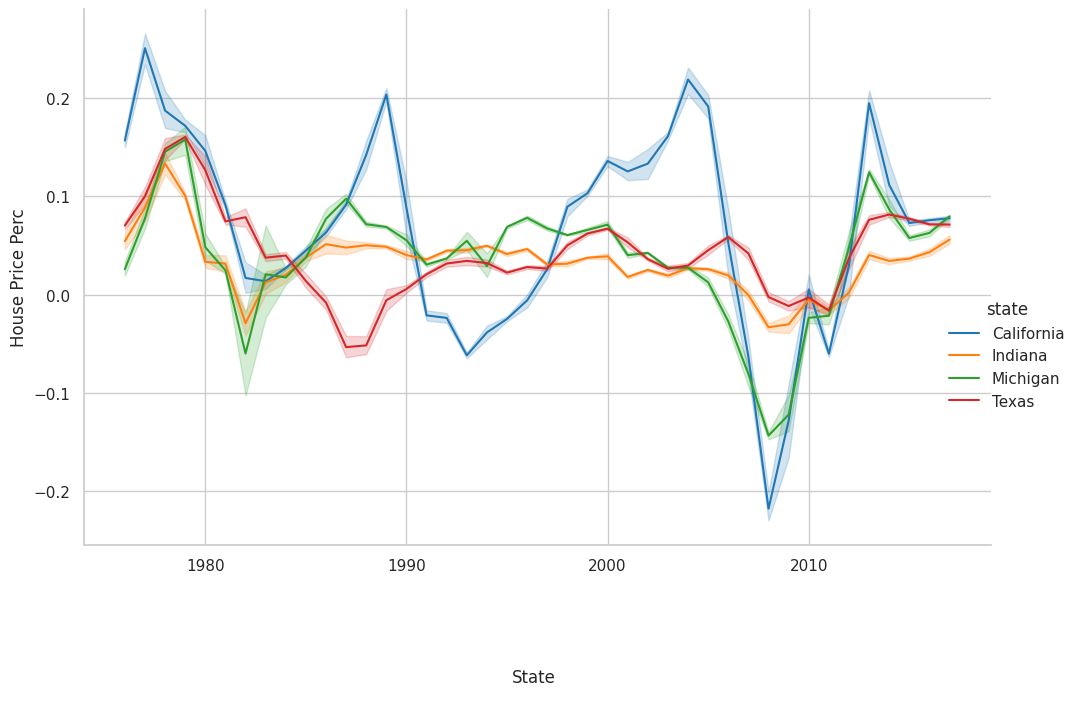

In [ ]:
#Colab AI assisted

#Convert the 'date' column to datetime format
house['date'] = pd.to_datetime(house['date'], errors='coerce')

# Extract the year from the date column
house['year'] = house['date'].dt.year

# Filter the DataFrame for the selected states
states = ['Michigan', 'California', 'Texas', 'Indiana']
filtered_house = house[house['state'].isin(states)]

# Create the line plot for 'house_price_perc', colored by 'state'
sns.set(style="whitegrid")
g = sns.relplot(data=filtered_house, x='year', y='house_price_perc', hue='state', kind='line', height=6, aspect=1.5, palette='tab10')

# Set the y-axis label
g.set_ylabels('House Price Perc')

# Remove the x-axis label since it's obvious
g.set_xlabels('')

# Position the legend using the 'legend' argument in 'FacetGrid.add_legend'
g.add_legend(legend_data=None, title='State', label_order=None, adjust_subtitles=False, loc='center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False)

# Adjust layout and display the plot
g.tight_layout()